#### Problem statement 1: To explore which issues or problems people in India are talking about on social media platforms:

1. we used the Reddit API for data scraping. 
2. Implemented an approach to retain only the data where users are talking about any issue or problem in India.
3. Additionally, perform exploratory data analysis (EDA) in Python to extract the various issues being talked about      and get other key insights. 
4. Training a classification model to classify posts into specific issues.

##### Install required packages:

In [57]:
!pip install praw
#!pip install textblob
#!pip install nltk
#!pip install sklearn

##### Import required libraries:

In [157]:
import praw
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

##### Reddit API authentication and extracting the data:

##### Reddit API credentials:

In [158]:
#Reddit API credentials
client_id = "A10vKDX_d6nhAh-O-bnWfQ"
client_secret = "etH1cIdV6th86AxLiwMF1g54li01Ag"
user_agent = "nlpbuddy"

##### Authenticate with Reddit API:

In [159]:
#Authenticating Reddit API
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

##### Defining the subreddit and query parameters:

In [160]:
#subreddit name and query parameters
subreddit_name = "india"
query = "issue OR problem"

##### Get subreddit instance:

In [161]:
#Get subreddit instance
subreddit = reddit.subreddit(subreddit_name)

##### Retrieve posts using the search method:

In [162]:
#Retrieving posts using search method
posts = []
for post in subreddit.search(query, limit=1000):
    posts.append({
        "title": post.title,
        "author": post.author.name,
        "score": post.score,
        "num_comments": post.num_comments,
        "created_utc": post.created_utc,
        "permalink": post.permalink
    })

##### Prints the posts extracted and saving it to a dataframe:

In [163]:
# Print the retrieved posts
for post in posts:
    print(f"Title: {post['title']}")
    print(f"Author: {post['author']}")
    print(f"Score: {post['score']}")
    print(f"Number of Comments: {post['num_comments']}")
    print(f"Created UTC: {post['created_utc']}")
    print(f"Permalink: {post['permalink']}")
    print()
    

# Additional processing or saving the data to a file can be done here
df = pd.DataFrame(list(posts))

Title: Passport Re-issue problem with fathers middle name
Author: Puzzleheaded-Bet1903
Score: 3
Number of Comments: 4
Created UTC: 1645990477.0
Permalink: /r/india/comments/t2vvc3/passport_reissue_problem_with_fathers_middle_name/

Title: What are the biggest issues/problems/threats India faces right now or in the near future?
Author: Ddog78
Score: 52
Number of Comments: 64
Created UTC: 1461786981.0
Permalink: /r/india/comments/4gqa9m/what_are_the_biggest_issuesproblemsthreats_india/

Title: Why doesn't Opposition use the difficulty faced by Farmers to take back the 3 farm laws and how it was also connected to Adani? Why they are just saying there problem of ED, CBI - there are so many problems that can help them connect with people more on these issues?
Author: BasisTrick3075
Score: 57
Number of Comments: 43
Created UTC: 1679727743.0
Permalink: /r/india/comments/121duci/why_doesnt_opposition_use_the_difficulty_faced_by/

Title: Parents addicted to reels and facebook, and its causing p

In [164]:
#Print the dataframe
df

,title,author,score,num_comments,created_utc,permalink
0,Passport Re-issue problem with fathers middle ...,Puzzleheaded-Bet1903,3,4,1.645990e+09,/r/india/comments/t2vvc3/passport_reissue_prob...
1,What are the biggest issues/problems/threats I...,Ddog78,52,64,1.461787e+09,/r/india/comments/4gqa9m/what_are_the_biggest_...
2,Why doesn't Opposition use the difficulty face...,BasisTrick3075,57,43,1.679728e+09,/r/india/comments/121duci/why_doesnt_oppositio...
3,"Parents addicted to reels and facebook, and it...",Icy_batata,665,150,1.684139e+09,/r/india/comments/13i2294/parents_addicted_to_...
4,The problem with political debate in India and...,PawsomePat,103,23,1.683609e+09,/r/india/comments/13cg77b/the_problem_with_pol...
...,...,...,...,...,...,...
229,"27 Years BJP Rule, 13 Years Modi ji CM, Still ...",Pale_Rest2423,199,27,1.669028e+09,/r/india/comments/z0w1ho/27_years_bjp_rule_13_...
230,Does IRCTC intentionally freezes the site duri...,life_rolla_costa,252,136,1.683871e+09,/r/india/comments/13fch2q/does_irctc_intention...
231,ADHD is the real India. Mental illness is a re...,FrontCauliflower5181,376,74,1.649472e+09,/r/india/comments/tzjqt2/adhd_is_the_real_indi...
232,Lets talk about Mental Issue,Chaos_head23,2,5,1.675888e+09,/r/india/comments/10x9rl1/lets_talk_about_ment...


##### Filter the posts to retain only those discussing issues or problems in India

In [139]:
#filtered_posts = [post for post in posts if re.search(r"(issue|problem|india)", post["title"], flags=re.IGNORECASE) and "india" in post["title"].lower()]

In [147]:
df = pd.DataFrame(filtered_posts)
df.head()

,title,author,score,num_comments,created_utc,permalink
0,What are the biggest issues/problems/threats I...,Ddog78,50,64,1.461787e+09,/r/india/comments/4gqa9m/what_are_the_biggest_...
1,The problem with political debate in India and...,PawsomePat,102,23,1.683609e+09,/r/india/comments/13cg77b/the_problem_with_pol...
2,The Problems With Entrance Exams In India,Anarchistdoc,48,62,1.683698e+09,/r/india/comments/13dhlwa/the_problems_with_en...
3,"In the US, all currency issued as far back as ...",naveenpun,1339,424,1.684597e+09,/r/india/comments/13mxxtk/in_the_us_all_curren...
4,India at #191 with 3.04% of people with Anxiet...,anubhav316,2207,610,1.678988e+09,/r/india/comments/11t0gty/india_at_191_with_30...


##### Data Pre-processing:

In [167]:
# Preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back to form text
    processed_text = " ".join(filtered_tokens)
    return processed_text

# Preprocess the post titles
df["processed_title"] = df["title"].apply(preprocess_text)
df.head()

,title,author,score,num_comments,created_utc,permalink,processed_title
0,Passport Re-issue problem with fathers middle ...,Puzzleheaded-Bet1903,3,4,1.645990e+09,/r/india/comments/t2vvc3/passport_reissue_prob...,passport issue problem fathers middle name
1,What are the biggest issues/problems/threats I...,Ddog78,52,64,1.461787e+09,/r/india/comments/4gqa9m/what_are_the_biggest_...,biggest issues problems threats india faces ri...
2,Why doesn't Opposition use the difficulty face...,BasisTrick3075,57,43,1.679728e+09,/r/india/comments/121duci/why_doesnt_oppositio...,opposition use difficulty faced farmers take b...
3,"Parents addicted to reels and facebook, and it...",Icy_batata,665,150,1.684139e+09,/r/india/comments/13i2294/parents_addicted_to_...,parents addicted reels facebook causing practi...
4,The problem with political debate in India and...,PawsomePat,103,23,1.683609e+09,/r/india/comments/13cg77b/the_problem_with_pol...,problem political debate india poison whatabou...


##### Topic modeling using LDA:

In [168]:
vectorizer = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1, 2), stop_words="english")
X = vectorizer.fit_transform(preprocessed_titles)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(X)

##### Get the most relevant keyword for each topic:

In [169]:
# Display the most significant words for each topic
feature_names = vectorizer.get_feature_names()
topic_keywords = []
for topic_weights in lda.components_:
    topic_keywords.append([feature_names[i] for i in topic_weights.argsort()[:-10 -1]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Assign issue labels based on the dominant topic's keyword:

In [176]:
print("Topic Modeling:")
for i, keywords in enumerate(topic_keywords):
    print(f"Topic {i+1}:")
    print(keywords)
    print()

# Assign labels to the issues
issue_labels = []
for topic_weights in topics:
    dominant_topic = topic_weights.argmax()
    issue_labels.append(dominant_topic)

Topic Modeling:
Topic 1:
['feeding stray', 'feeding', 'stray dogs', 'dogs', 'magistrates', 'girl', 'executive magistrates', 'executive', 'girl like', 'person interested', 'municipal authorities', 'nagpur bench', 'nagpur', 'municipal', 'sub divisional', 'persuasion warning', 'persuasion', 'manipur authorises', 'sub', 'kashmir', 'shaved head', 'shaved', 'mean', 'metro smiling', 'mean seriously', 'merely seconds', 'turned head', 'merely', 'turned', 'problem girl', 'room', 'pal malik', 'lingayat', 'masters ambani', 'unemployment inflation', 'media spread', 'masters', 'ignorant kashmir', 'pulwama laparvahi', 'laparvahi', 'silenced pulwama', 'kashmir silenced', 'attention real', 'fort', 'red fort', 'divert', 'red', 'divert attention', 'real issues', 'satya', 'pal', 'satya pal', 'modi problem', 'corruption ignorant', 'silenced', 'ignorant', 'problem corruption', 'pulwama', 'register', 'passport appointment', 'passport travel', 'photo passport', 'travel long', 'inflation', 'moment', 'need help

##### Adding issue label category to the dataframe:

In [174]:
#Add issue labels to the dataframe
df["issue_label"] = issue_labels
df.head()

,title,author,score,num_comments,created_utc,permalink,processed_title,issue_label
0,Passport Re-issue problem with fathers middle ...,Puzzleheaded-Bet1903,3,4,1.645990e+09,/r/india/comments/t2vvc3/passport_reissue_prob...,passport issue problem fathers middle name,4
1,What are the biggest issues/problems/threats I...,Ddog78,52,64,1.461787e+09,/r/india/comments/4gqa9m/what_are_the_biggest_...,biggest issues problems threats india faces ri...,2
2,Why doesn't Opposition use the difficulty face...,BasisTrick3075,57,43,1.679728e+09,/r/india/comments/121duci/why_doesnt_oppositio...,opposition use difficulty faced farmers take b...,1
3,"Parents addicted to reels and facebook, and it...",Icy_batata,665,150,1.684139e+09,/r/india/comments/13i2294/parents_addicted_to_...,parents addicted reels facebook causing practi...,4
4,The problem with political debate in India and...,PawsomePat,103,23,1.683609e+09,/r/india/comments/13cg77b/the_problem_with_pol...,problem political debate india poison whatabou...,0


##### Exploratory data analysis (EDA):

In [171]:
# Add issue labels to the dataframe
df["issue_label"] = issue_labels

In [172]:
# Count the number of posts per issue label
issue_counts = df["issue_label"].value_counts()

# Display the counts and corresponding issue labels
print("Issue Counts:")
print(issue_counts)

Issue Counts:
issue_label
2    50
0    49
3    49
4    45
1    41
Name: count, dtype: int64


##### Plotting the graph wrt Number of posts per Issue:

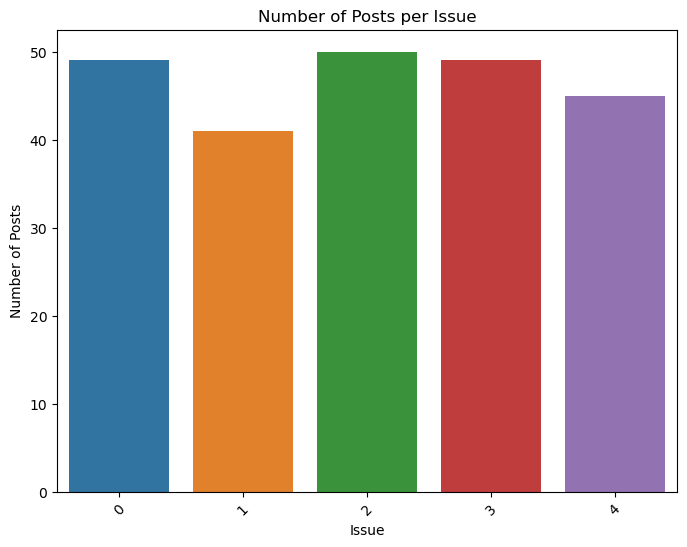

In [175]:
# Plot the issue counts
plt.figure(figsize=(8, 6))
sns.barplot(x=issue_counts.index, y=issue_counts.values)
plt.title("Number of Posts per Issue")
plt.xlabel("Issue")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()

##### Optional task: Training a classification model:

In [173]:
# Train a classification model
X_train, X_test, y_train, y_test = train_test_split(X, issue_labels, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the issue labels for test data
y_pred = classifier.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.67      0.18      0.29        11
           2       0.47      0.44      0.45        16
           3       0.33      0.50      0.40         6
           4       0.21      0.60      0.32         5

    accuracy                           0.43        47
   macro avg       0.50      0.45      0.42        47
weighted avg       0.54      0.43      0.43        47



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

#### Problem statement 2: 3 AI Issues using Wysa chatbot

1. Wysa chatbot is mental health assistant bot.



2. Typically while using this bot, I didn't find much drawbacks as it's been trained decently.



3. Though that's the case, I've encountered a couple of issues which could probably taken care of by training further more deeper.

    (i) One of the mnajor intent's of this app is to reduce the loneliness feeling in the users and to provide therapy to make them feel comfortable. For this I majorly feel that the chat with a bot should be surreal as a chat/conversation with a real human being. But in the case of wysa bot, it is not responding for few things like what it does as a bot when asked in the mid of some random chat. 
    
    (ii) Some queries like below 2nd screenshot shared which was asked by me that to name the top therapists I can consult, for which the possible answers/reply could be sorry I'm not sure about this or throwing up some leads neither of the replies were thrown as a reply. I feel it could be trained in this aspect.
    
    (iii) Sometimes it's just asking for auto-replies which has auto send messages to be clicked by selecting the best out of the options which could be replaced by the text typing bar along with the auto-replies.
    
    (iv) Certain times, when users are using abusive/foul language (like sexual content) is not being realised by the bot. Training a bot to say that "User shouldn't use the sexual words with the bot" as it's intent is not that.
    
    
    
4. Overall for the intent that it've been trained, though it has few setbacks, it is doing great job in the majority of the things.

<img src="screenshots/IMG_5588.PNG" width="300"/>

<img src="screenshots/IMG_5589.PNG" width="300"/>

<div>
<img src="attachment:IMG_5589.PNG" width="500"/>
</div>

<img src="screenshots/IMG_5590.PNG" width="300"/>

<img src="screenshots/IMG_5591.PNG" width="300"/>

### NOTE: This is just the trials that were done to understand how the bot is reacting and to find the drawbacks it is facing.

#### NOTE: The below screenshots contains some sexual related words. This is one such an issue that must be considered. 

<img src="screenshots/IMG_5611.PNG" width="300"/>